# ROC Curves related to StyleGAN3 generated image detection

In [73]:
# download and unzip pkls with results
# wget https://www.dropbox.com/s/h19xrb3v77llxoe/results.zip?dl=0 --output-document results.zip
# unzip results.zip

In [74]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

In [75]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False
mpl.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
mpl.rcParams.update(pgf_with_rc_fonts)

import matplotlib.pyplot as plt
fontsize = 18
plt.rc('text', usetex=True)
plt.rc('font', family='sans',size=fontsize)
plt.rc('legend',fontsize=fontsize)
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)
plt.rc('axes',labelsize=fontsize,titlesize=fontsize)
plt.rc('lines',linewidth=2)
%matplotlib inline

In [76]:
def scores_voting(row):
    scores_vot = row['scores'][:, row['maj_voting']]
    return scores_vot

In [77]:
def max_scores_voting(row):
    max_score_vot = np.nanmax(row['scores_maj_voting']) if row['maj_voting'] == 1 else -np.nanmax(row['scores_maj_voting'])
    return max_score_vot

In [78]:
def scores_fusion(row):
    fused_score = np.mean([row['image_score_A'], row['image_score_B'], row['image_score_C'], row['image_score_D'], row['image_score_E']])
    return fused_score

In [79]:
def plot_roc_auc(y_true, y_pred):
    auc = roc_auc_score(y_true, y_pred)
    print(f'AUC: {auc}')
    fpr, tpr, thr = roc_curve(y_true, y_pred)
    
    plt.figure(figsize=(6,6))
    ax = plt.gca()
    ax.plot(fpr, tpr, label=f'AUC: {auc:.6f}')
    plt.xlabel('$\mathrm{FPR}$')
    plt.ylabel('$\mathrm{TPR}$')
    plt.xlim(-0.01, 1.01);
    plt.ylim(-0.01, 1.01);
    plt.legend(loc='lower right')
    plt.grid();

# Train method A

In [80]:
df_cnn_images_A = pd.read_pickle('results/method_A.pkl')

In [81]:
df_cnn_images_A['hard_predictions'] = df_cnn_images_A['scores'].apply(np.argmax, axis=1)
df_cnn_images_A['maj_voting'] = df_cnn_images_A['hard_predictions'].map(np.any).astype(int)
df_cnn_images_A['scores_maj_voting'] = df_cnn_images_A.apply(scores_voting, axis=1)
df_cnn_images_A['image_score'] = df_cnn_images_A.apply(max_scores_voting, axis=1)

# Train method B

In [82]:
df_cnn_images_B = pd.read_pickle('results/method_B.pkl')

In [83]:
df_cnn_images_B['hard_predictions'] = df_cnn_images_B['scores'].apply(np.argmax, axis=1)
df_cnn_images_B['maj_voting'] = df_cnn_images_B['hard_predictions'].map(np.any).astype(int)
df_cnn_images_B['scores_maj_voting'] = df_cnn_images_B.apply(scores_voting, axis=1)
df_cnn_images_B['image_score'] = df_cnn_images_B.apply(max_scores_voting, axis=1)

# Train method C

In [84]:
df_cnn_images_C = pd.read_pickle('results/method_C.pkl')

In [85]:
df_cnn_images_C['hard_predictions'] = df_cnn_images_C['scores'].apply(np.argmax, axis=1)
df_cnn_images_C['maj_voting'] = df_cnn_images_C['hard_predictions'].map(np.any).astype(int)
df_cnn_images_C['scores_maj_voting'] = df_cnn_images_C.apply(scores_voting, axis=1)
df_cnn_images_C['image_score'] = df_cnn_images_C.apply(max_scores_voting, axis=1)

# Train method D

In [86]:
df_cnn_images_D = pd.read_pickle('results/method_D.pkl')

In [87]:
df_cnn_images_D['hard_predictions'] = df_cnn_images_D['scores'].apply(np.argmax, axis=1)
df_cnn_images_D['maj_voting'] = df_cnn_images_D['hard_predictions'].map(np.any).astype(int)
df_cnn_images_D['scores_maj_voting'] = df_cnn_images_D.apply(scores_voting, axis=1)
df_cnn_images_D['image_score'] = df_cnn_images_D.apply(max_scores_voting, axis=1)

# Train method E

In [88]:
df_cnn_images_E = pd.read_pickle('results/method_E.pkl')

In [89]:
df_cnn_images_E['hard_predictions'] = df_cnn_images_E['scores'].apply(np.argmax, axis=1)
df_cnn_images_E['maj_voting'] = df_cnn_images_E['hard_predictions'].map(np.any).astype(int)
df_cnn_images_E['scores_maj_voting'] = df_cnn_images_E.apply(scores_voting, axis=1)
df_cnn_images_E['image_score'] = df_cnn_images_E.apply(max_scores_voting, axis=1)

# Fusion

In [90]:
df_cnn_images_fus = df_cnn_images_A.rename(columns={'image_score': 'image_score_A'})
df_cnn_images_fus['image_score_B'] = df_cnn_images_B['image_score']
df_cnn_images_fus['image_score_C'] = df_cnn_images_C['image_score']
df_cnn_images_fus['image_score_D'] = df_cnn_images_D['image_score']
df_cnn_images_fus['image_score_E'] = df_cnn_images_E['image_score']

df_cnn_images_fus['fused_scores'] = df_cnn_images_fus.apply(scores_fusion, axis=1)

# ROC 1) afhq-v2-test vs alias_free_r_afhqv2

In [91]:
test_synth_folder = 'alias-free-r-afhqv2-512x512'
test_real_folder = 'afhq-v2-test'
import matplotlib
matplotlib.rcParams['text.usetex'] = False


In [92]:
df_cnn_images_test_synth = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_synth_folder)] 
df_cnn_images_test_real = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_real_folder)]  
df_cnn_images_test = pd.concat([df_cnn_images_test_synth, df_cnn_images_test_real]).reset_index().drop('index', axis=1)
df_cnn_images_test_1 = df_cnn_images_test.copy()

AUC: 0.9991032719836401


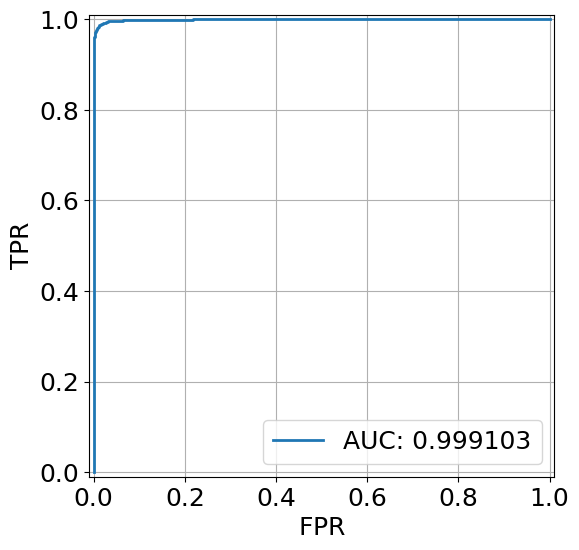

In [93]:
plot_roc_auc(df_cnn_images_test['label'].values, df_cnn_images_test['fused_scores'].values)

# ROC 2) afhq-v2-test vs alias_free_t_afhqv2

In [94]:
test_synth_folder = 'alias-free-t-afhqv2-512x512'
test_real_folder = 'afhq-v2-test'

In [95]:
df_cnn_images_test_synth = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_synth_folder)] 
df_cnn_images_test_real = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_real_folder)]
df_cnn_images_test = pd.concat([df_cnn_images_test_synth, df_cnn_images_test_real]).reset_index().drop('index', axis=1)
df_cnn_images_test_2 = df_cnn_images_test.copy()

AUC: 0.9999360599863667


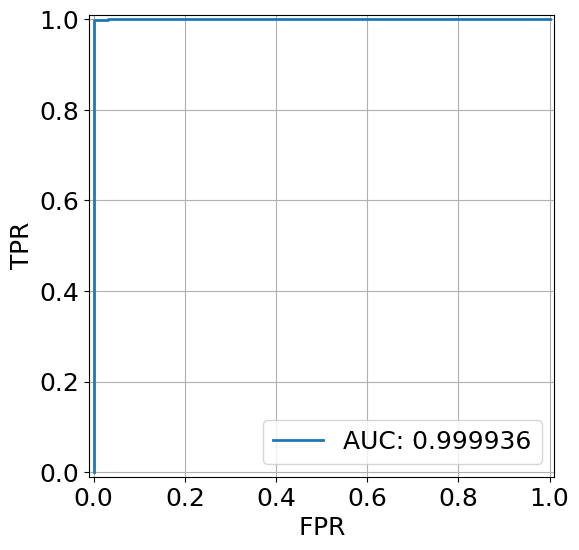

In [96]:
plot_roc_auc(df_cnn_images_test['label'].values, df_cnn_images_test['fused_scores'].values)

# ROC 3) Metfaces-in-the-wild-test vs alias_free_r_metfacesu

In [97]:
test_synth_folder = 'alias-free-r-metfacesu-1024x1024'
test_real_folder = 'Metfaces-in-the-wild-test'

In [98]:
df_cnn_images_test_synth = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_synth_folder)] 
df_cnn_images_test_real = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_real_folder)]  
df_cnn_images_test = pd.concat([df_cnn_images_test_synth, df_cnn_images_test_real]).reset_index().drop('index', axis=1)
df_cnn_images_test_3 = df_cnn_images_test.copy()

AUC: 0.9919059375000001


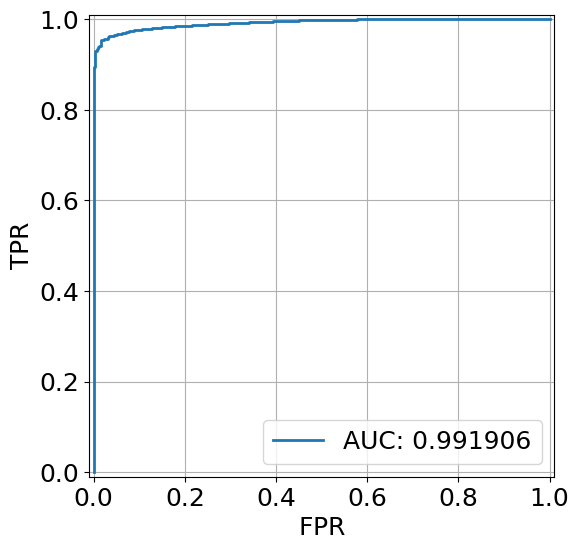

In [99]:
plot_roc_auc(df_cnn_images_test['label'].values, df_cnn_images_test['fused_scores'].values)

# ROC 4) Metfaces-in-the-wild-test vs alias_free_t_metfacesu

In [100]:
test_synth_folder = 'alias-free-t-metfacesu-1024x1024'
test_real_folder = 'Metfaces-in-the-wild-test'

In [101]:
df_cnn_images_test_synth = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_synth_folder)] 
df_cnn_images_test_real = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_real_folder)]  
df_cnn_images_test = pd.concat([df_cnn_images_test_synth, df_cnn_images_test_real]).reset_index().drop('index', axis=1)
df_cnn_images_test_4 = df_cnn_images_test.copy()

AUC: 0.9964493749999999


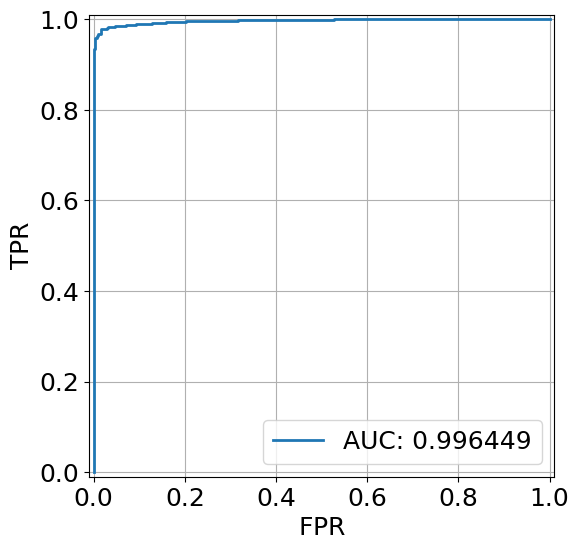

In [102]:
plot_roc_auc(df_cnn_images_test['label'].values, df_cnn_images_test['fused_scores'].values)

# ROC 5) FFHQ-in-the-wild-20k vs alias_free_r_no_compression

In [103]:
test_synth_folder = 'generated-ours-r-ffhq-u-8324-2-24400'
test_real_folder = 'FFHQ-in-the-wild-20k'

In [104]:
df_cnn_images_test_synth = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_synth_folder)] 
df_cnn_images_test_real = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_real_folder)]  
df_cnn_images_test = pd.concat([df_cnn_images_test_synth, df_cnn_images_test_real]).reset_index().drop('index', axis=1)
df_cnn_images_test_5 = df_cnn_images_test.copy()

AUC: 0.99999998


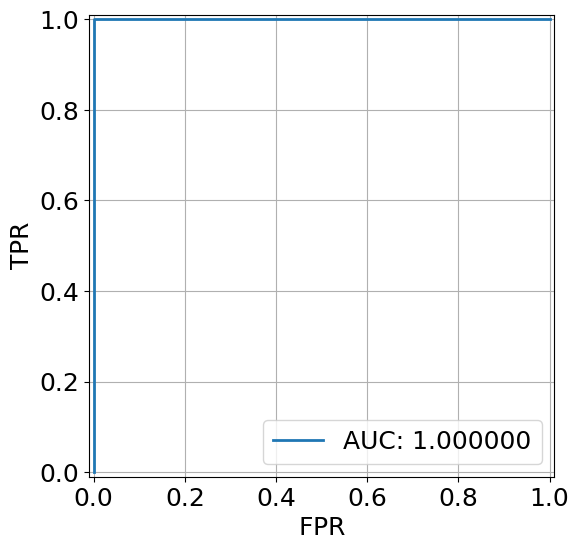

In [105]:
plot_roc_auc(df_cnn_images_test['label'].values, df_cnn_images_test['fused_scores'].values)

# ROC 6) FFHQ-in-the-wild-20k vs alias_free_t_no_compression

In [106]:
test_synth_folder = 'generated-ours-t-ffhq-u-8325-4-25000'
test_real_folder = 'FFHQ-in-the-wild-20k'

In [107]:
df_cnn_images_test_synth = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_synth_folder)] 
df_cnn_images_test_real = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_real_folder)]   
df_cnn_images_test = pd.concat([df_cnn_images_test_synth, df_cnn_images_test_real]).reset_index().drop('index', axis=1)
df_cnn_images_test_6 = df_cnn_images_test.copy()

AUC: 0.9999986750000001


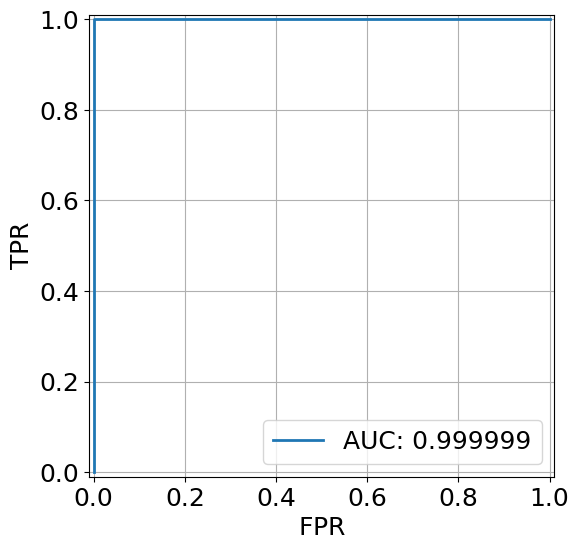

In [108]:
plot_roc_auc(df_cnn_images_test['label'].values, df_cnn_images_test['fused_scores'].values)

# ROC 7) FFHQ-in-the-wild-20k vs alias_free_r_compression

In [109]:
test_synth_folder = 'config-r'
test_real_folder = 'FFHQ-in-the-wild-20k'

In [110]:
df_cnn_images_test_synth = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_synth_folder)] 
df_cnn_images_test_real = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_real_folder)]  
df_cnn_images_test = pd.concat([df_cnn_images_test_synth, df_cnn_images_test_real]).reset_index().drop('index', axis=1)
df_cnn_images_test_7 = df_cnn_images_test.copy()

AUC: 0.9995815349999999


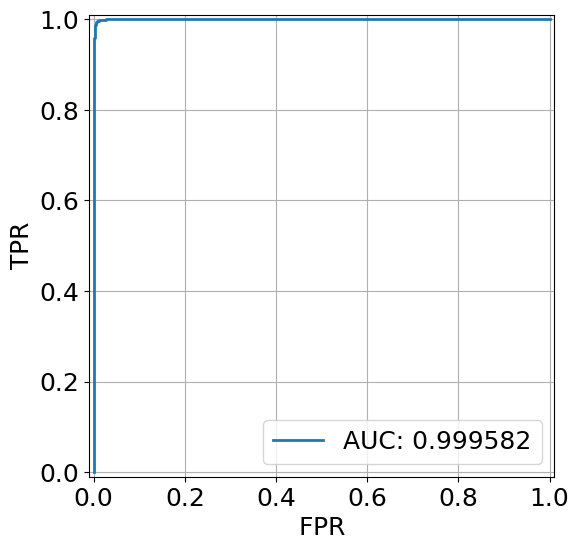

In [111]:
plot_roc_auc(df_cnn_images_test['label'].values, df_cnn_images_test['fused_scores'].values)

# ROC 8) FFHQ-in-the-wild-20k vs alias_free_t_compression

In [112]:
test_synth_folder = 'config-t'
test_real_folder = 'FFHQ-in-the-wild-20k'

In [113]:
df_cnn_images_test_synth = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_synth_folder)] 
df_cnn_images_test_real = df_cnn_images_fus[df_cnn_images_fus['image'].str.contains(test_real_folder)]  
df_cnn_images_test = pd.concat([df_cnn_images_test_synth, df_cnn_images_test_real]).reset_index().drop('index', axis=1)
df_cnn_images_test_8 = df_cnn_images_test.copy()

AUC: 0.9995660525000001


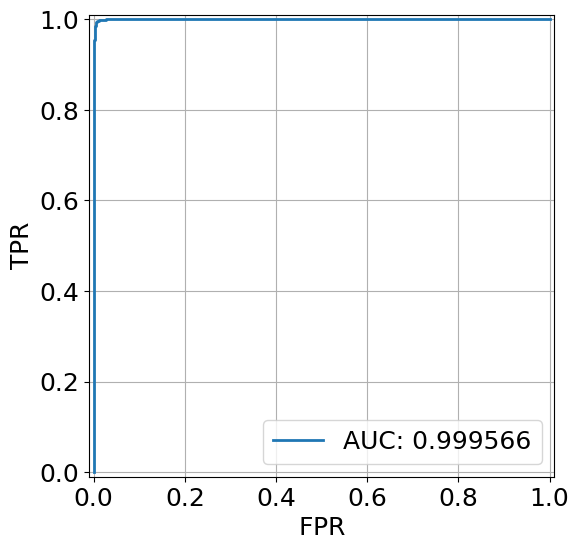

In [114]:
plot_roc_auc(df_cnn_images_test['label'].values, df_cnn_images_test['fused_scores'].values)

# ROC 9) Global

AUC: 0.9995606906259085


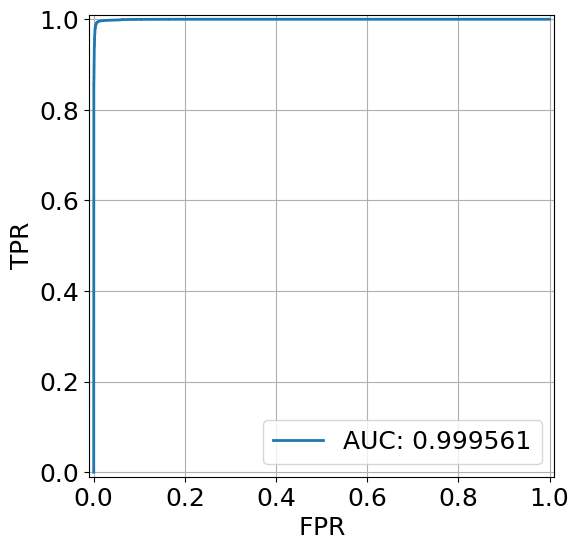

In [115]:
plot_roc_auc(df_cnn_images_fus['label'].values, df_cnn_images_fus['fused_scores'].values)

# ROC Global + ROCs 1:8 zoomed in top-left corner

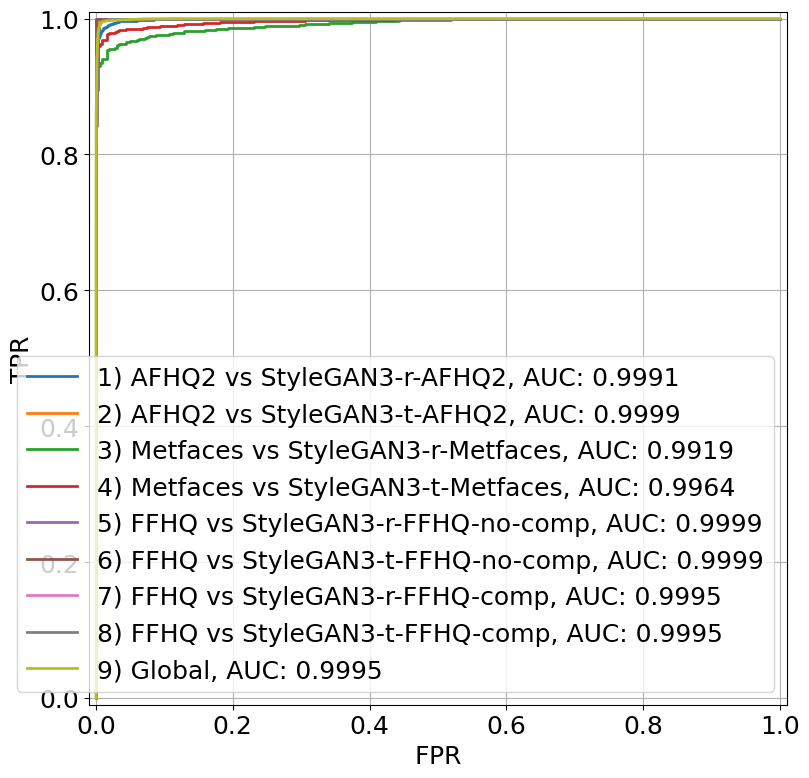

In [116]:
plt.figure(figsize=(9,9))
ax = plt.gca()
plt.xlabel('$\mathrm{FPR}$')
plt.ylabel('$\mathrm{TPR}$')
plt.xlim(-0.01, 1.01);
plt.ylim(-0.01, 1.01);

plt.grid();

auc = roc_auc_score(df_cnn_images_test_1['label'].values, df_cnn_images_test_1['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_1['label'].values, df_cnn_images_test_1['fused_scores'].values)
ax.plot(fpr, tpr, label=f"1) AFHQ2 vs StyleGAN3-r-AFHQ2, AUC: {str(auc)[:6]}")

auc = roc_auc_score(df_cnn_images_test_2['label'].values, df_cnn_images_test_2['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_2['label'].values, df_cnn_images_test_2['fused_scores'].values)
ax.plot(fpr, tpr, label=f"2) AFHQ2 vs StyleGAN3-t-AFHQ2, AUC: {str(auc)[:6]}")

auc = roc_auc_score(df_cnn_images_test_3['label'].values, df_cnn_images_test_3['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_3['label'].values, df_cnn_images_test_3['fused_scores'].values)
ax.plot(fpr, tpr, label=f"3) Metfaces vs StyleGAN3-r-Metfaces, AUC: {str(auc)[:6]}")

auc = roc_auc_score(df_cnn_images_test_4['label'].values, df_cnn_images_test_4['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_4['label'].values, df_cnn_images_test_4['fused_scores'].values)
ax.plot(fpr, tpr, label=f"4) Metfaces vs StyleGAN3-t-Metfaces, AUC: {str(auc)[:6]}")

auc = roc_auc_score(df_cnn_images_test_5['label'].values, df_cnn_images_test_5['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_5['label'].values, df_cnn_images_test_5['fused_scores'].values)
ax.plot(fpr, tpr, label=f"5) FFHQ vs StyleGAN3-r-FFHQ-no-comp, AUC: {str(auc)[:6]}")

auc = roc_auc_score(df_cnn_images_test_6['label'].values, df_cnn_images_test_6['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_6['label'].values, df_cnn_images_test_6['fused_scores'].values)
ax.plot(fpr, tpr, label=f"6) FFHQ vs StyleGAN3-t-FFHQ-no-comp, AUC: {str(auc)[:6]}")

auc = roc_auc_score(df_cnn_images_test_7['label'].values, df_cnn_images_test_7['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_7['label'].values, df_cnn_images_test_7['fused_scores'].values)
ax.plot(fpr, tpr, label=f"7) FFHQ vs StyleGAN3-r-FFHQ-comp, AUC: {str(auc)[:6]}")

auc = roc_auc_score(df_cnn_images_test_8['label'].values, df_cnn_images_test_8['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_8['label'].values, df_cnn_images_test_8['fused_scores'].values)
ax.plot(fpr, tpr, label=f"8) FFHQ vs StyleGAN3-t-FFHQ-comp, AUC: {str(auc)[:6]}")

auc = roc_auc_score(df_cnn_images_fus['label'].values, df_cnn_images_fus['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_fus['label'].values, df_cnn_images_fus['fused_scores'].values)
ax.plot(fpr, tpr, label=f"9) Global, AUC: {str(auc)[:6]}")

plt.legend(loc='lower right');

# figure_name = 'ROC_global_1-8'
# figure_path = '{}.pdf'.format(figure_name)
# plt.savefig(figure_path,bbox_inches='tight')

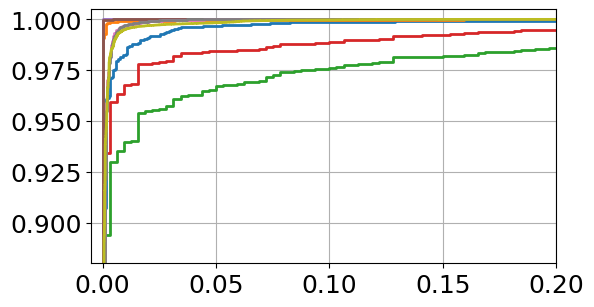

In [117]:
plt.figure(figsize=(6, 3.3))
ax = plt.gca()
#plt.xlabel('$\mathrm{FPR}$')
#plt.ylabel('$\mathrm{TPR}$')

plt.xlim(-0.005, 0.2);
plt.ylim(0.88, 1.005);

plt.grid();

auc = roc_auc_score(df_cnn_images_test_1['label'].values, df_cnn_images_test_1['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_1['label'].values, df_cnn_images_test_1['fused_scores'].values)
ax.plot(fpr, tpr, label=f"1) AFHQ2 vs StyleGAN3-r-AFHQ', AUC: {auc:.3f}")

auc = roc_auc_score(df_cnn_images_test_2['label'].values, df_cnn_images_test_2['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_2['label'].values, df_cnn_images_test_2['fused_scores'].values)
ax.plot(fpr, tpr, label=f"2) AFHQ2 vs StyleGAN3-t-AFHQ', AUC: {auc:.3f}")

auc = roc_auc_score(df_cnn_images_test_3['label'].values, df_cnn_images_test_3['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_3['label'].values, df_cnn_images_test_3['fused_scores'].values)
ax.plot(fpr, tpr, label=f"3) Metfaces vs StyleGAN3-r-Metfaces', AUC: {auc:.3f}")

auc = roc_auc_score(df_cnn_images_test_4['label'].values, df_cnn_images_test_4['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_4['label'].values, df_cnn_images_test_4['fused_scores'].values)
ax.plot(fpr, tpr, label=f"4) Metfaces vs StyleGAN3-t-Metfaces', AUC: {auc:.3f}")

auc = roc_auc_score(df_cnn_images_test_5['label'].values, df_cnn_images_test_5['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_5['label'].values, df_cnn_images_test_5['fused_scores'].values)
ax.plot(fpr, tpr, label=f"5) FFHQ vs StyleGAN3-r-FFHQ-no-comp', AUC: {auc:.3f}")

auc = roc_auc_score(df_cnn_images_test_6['label'].values, df_cnn_images_test_6['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_6['label'].values, df_cnn_images_test_6['fused_scores'].values)
ax.plot(fpr, tpr, label=f"6) FFHQ vs StyleGAN3-t-FFHQ-no-comp', AUC: {auc:.3f}")

auc = roc_auc_score(df_cnn_images_test_7['label'].values, df_cnn_images_test_7['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_7['label'].values, df_cnn_images_test_7['fused_scores'].values)
ax.plot(fpr, tpr, label=f"7) FFHQ vs StyleGAN3-r-FFHQ-comp', AUC: {auc:.3f}")

auc = roc_auc_score(df_cnn_images_test_8['label'].values, df_cnn_images_test_8['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_test_8['label'].values, df_cnn_images_test_8['fused_scores'].values)
ax.plot(fpr, tpr, label=f"8) FFHQ vs StyleGAN3-t-FFHQ-comp', AUC: {auc:.3f}")

auc = roc_auc_score(df_cnn_images_fus['label'].values, df_cnn_images_fus['fused_scores'].values)
fpr, tpr, thr = roc_curve(df_cnn_images_fus['label'].values, df_cnn_images_fus['fused_scores'].values)
ax.plot(fpr, tpr, label=f"9) Global, AUC: {auc:.3f}");

# figure_name = 'zoom_ROC_global_1-8'
# figure_path = '{}.pdf'.format(figure_name)
# plt.savefig(figure_path,bbox_inches='tight')